In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.applications.resnet import ResNet50, preprocess_input
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load Training Data and Testing Data
trainData = np.load("/content/drive/MyDrive/Colab Notebooks/Spring Summer 2021/Research Methodology/Project/trainData_32.npy")
trainLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Spring Summer 2021/Research Methodology/Project/trainLabels_32.npy")
testData = np.load("/content/drive/MyDrive/Colab Notebooks/Spring Summer 2021/Research Methodology/Project/testData_32.npy")
testLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Spring Summer 2021/Research Methodology/Project/testLabels_32.npy")

# Reshape Training and Testing Data
trainData = np.reshape(trainData, (trainData.shape[0], 32, 32, 3))
testData = np.reshape(testData, (testData.shape[0], 32, 32, 3))

# Preprocessing Training and Testing Data
XtrainNorm = preprocess_input(trainData)
XtestNorm = preprocess_input(testData)

# One-Hot Encoding of Training and Testing Labels
YtrainEncoded = np_utils.to_categorical(trainLabels, 43)
YtestEncoded = np_utils.to_categorical(testLabels, 43)

print("Shape of Training Data:   {}".format(XtrainNorm.shape))
print("Shape of Training Labels: {}".format(YtrainEncoded.shape))

print("\nShape of Testing Data:    {}".format(XtestNorm.shape))
print("Shape of Testing Labels:  {}".format(YtestEncoded.shape))

Shape of Training Data:   (39209, 32, 32, 3)
Shape of Training Labels: (39209, 43)

Shape of Testing Data:    (12630, 32, 32, 3)
Shape of Testing Labels:  (12630, 43)


Epoch 1/20
1226/1226 [==============================] - 82s 30ms/step - loss: 3.4508 - accuracy: 0.0872 - val_loss: 2.0237 - val_accuracy: 0.3593
Epoch 2/20
1226/1226 [==============================] - 37s 30ms/step - loss: 1.8978 - accuracy: 0.3944 - val_loss: 1.2272 - val_accuracy: 0.5969
Epoch 3/20
1226/1226 [==============================] - 35s 28ms/step - loss: 1.0317 - accuracy: 0.6580 - val_loss: 0.4206 - val_accuracy: 0.8644
Epoch 4/20
1226/1226 [==============================] - 35s 29ms/step - loss: 0.4023 - accuracy: 0.8665 - val_loss: 0.2646 - val_accuracy: 0.9250
Epoch 5/20
1226/1226 [==============================] - 36s 29ms/step - loss: 0.2158 - accuracy: 0.9304 - val_loss: 0.2163 - val_accuracy: 0.9514
Epoch 6/20
1226/1226 [==============================] - 36s 29ms/step - loss: 0.1326 - accuracy: 0.9598 - val_loss: 0.1754 - val_accuracy: 0.9580
Epoch 7/20
1226/1226 [==============================] - 38s 31ms/step - loss: 0.0943 - accuracy: 0.9715 - val_loss: 0.2127 -

Text(0.5, 1.0, 'Loss and Accuracy Curves')

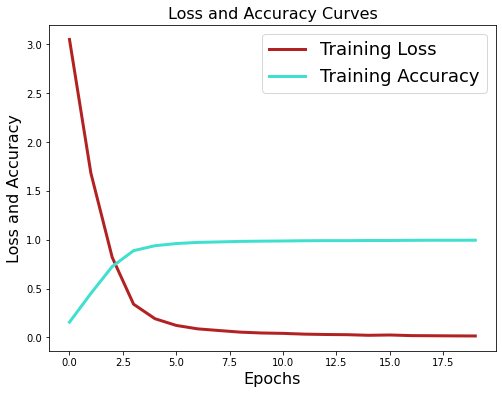

In [ ]:
# Building a custom CNN model
model = Sequential()

# Block 1:- 2-Convolution Layers, 1-MaxPooling Layer & 1-Dropout Layer
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# Block 2:- 2-Convolution Layers, 1-MaxPooling Layer & 1-Dropout Layer
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# Block 3:- 2-Convolution Layers, 1-MaxPooling Layer & 1-Dropout Layer
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

# Block 4:- 2-Convolution Layers, 1-MaxPooling Layer & 1-Dropout Layer
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

# Flatten Layer
model.add(Flatten(name='flatten'))

# FC1 Layer
model.add(Dense(1024, activation='relu', name='fc1'))

# FC2 Layer
model.add(Dense(512, activation='relu', name='fc2'))

# Output Layer
model.add(Dense(43, activation='softmax', name='output'))

# Model compiled using SGD Optimizier
model.compile(loss='categorical_crossentropy', optimizer = SGD(learning_rate=0.001, momentum=0.9, decay=0.00001), metrics = ['accuracy'])

# Model Fitting
history = model.fit(XtrainNorm, YtrainEncoded, batch_size=32, shuffle=True, epochs=20, validation_data=(XtestNorm, YtestEncoded))

# Model Evaluating for Training Data
training = model.evaluate(XtrainNorm, YtrainEncoded)
trainingAcc = training[-1]*100
print("Training Accuracy = {}%".format(trainingAcc))

# Model Evaluating for Testing Data
testing = model.evaluate(XtestNorm, YtestEncoded, batch_size=1)
testingAcc = testing[-1]*100
print("Testing Accuracy = {}%".format(testingAcc))

# Plotting Loss and Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'], 'firebrick', linewidth=3.0)
plt.plot(history.history['accuracy'], 'turquoise', linewidth=3.0)
plt.legend(['Training Loss','Training Accuracy'], fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss and Accuracy', fontsize=16)
plt.title('Loss and Accuracy Curves', fontsize=16)

In [ ]:
# Predicting Labels for Testing Data
predictedY = model.predict(XtestNorm)
Ytest = np.argmax(YtestEncoded, axis = 1)
YPred = np.argmax(predictedY, axis = 1)

# Classification Report for Testing Data
print("Classification Report: ")
print(classification_report(Ytest, YPred))

# Confusion Matrix for Testing Data
print("Confusion Matrix: ")
print(confusion_matrix(Ytest, YPred))

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.99      0.99      0.99       720
           2       0.98      1.00      0.99       750
           3       0.98      0.96      0.97       450
           4       1.00      0.99      0.99       660
           5       0.96      0.99      0.97       630
           6       0.96      0.97      0.97       150
           7       0.99      0.99      0.99       450
           8       0.99      0.94      0.96       450
           9       0.98      1.00      0.99       480
          10       1.00      1.00      1.00       660
          11       0.90      0.98      0.94       420
          12       1.00      0.97      0.98       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.95      1.00      0.97       210
          16       0.97      1.00      0.98       150
   